In [59]:
import os
import torch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

In [28]:
mask_data = pd.read_csv('../data/train/train.csv')
#DataFrame 생성
mask_data.shape
mask_data['gender'] = mask_data.gender.map({'female' : 0, 'male' :1})
mask_data

,id,gender,race,age,path
0,000001,0,Asian,45,000001_female_Asian_45
1,000002,0,Asian,52,000002_female_Asian_52
2,000004,1,Asian,54,000004_male_Asian_54
3,000005,0,Asian,58,000005_female_Asian_58
4,000006,0,Asian,59,000006_female_Asian_59
...,...,...,...,...,...
2695,006954,1,Asian,19,006954_male_Asian_19
2696,006955,1,Asian,19,006955_male_Asian_19
2697,006956,1,Asian,19,006956_male_Asian_19
2698,006957,1,Asian,20,006957_male_Asian_20


In [50]:
#각 값에 대한 data type 확인 가능
mask_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2700 non-null   object
 1   gender  2700 non-null   int64 
 2   race    2700 non-null   object
 3   age     2700 non-null   int64 
 4   path    2700 non-null   object
dtypes: int64(2), object(3)
memory usage: 105.6+ KB


In [29]:
#index location function
print(mask_data.loc[:5])

       id  gender   race  age                    path
0  000001       0  Asian   45  000001_female_Asian_45
1  000002       0  Asian   52  000002_female_Asian_52
2  000004       1  Asian   54    000004_male_Asian_54
3  000005       0  Asian   58  000005_female_Asian_58
4  000006       0  Asian   59  000006_female_Asian_59
5  000007       0  Asian   58  000007_female_Asian_58


In [54]:
# 총 데이터 : 2700개
# 최소나이는 18살, 최대나이는 60세이다.
# id 가 data 의 갯수와 unique 의 갯수가 맞지 않은걸로 봐서 중복 id 가 하나 있음을 알 수 있다.
mask_data.describe(include='all')

,id,gender,race,age,path
count,2700,2700.000000,2700,2700.000000,2700
unique,2699,NaN,1,NaN,2700
top,003397,NaN,Asian,NaN,001274_female_Asian_23
freq,2,NaN,2700,NaN,1
mean,NaN,0.385926,NaN,37.708148,NaN
std,NaN,0.486903,NaN,16.985904,NaN
min,NaN,0.000000,NaN,18.000000,NaN
25%,NaN,0.000000,NaN,20.000000,NaN
50%,NaN,0.000000,NaN,36.000000,NaN
75%,NaN,1.000000,NaN,55.000000,NaN


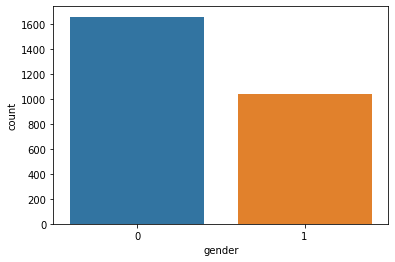

In [63]:
#0 은 여자 1은 남자 여자 데이터가 훨씬 많음
mask_data['gender'].value_counts()
sns.countplot(data=mask_data, x='gender')

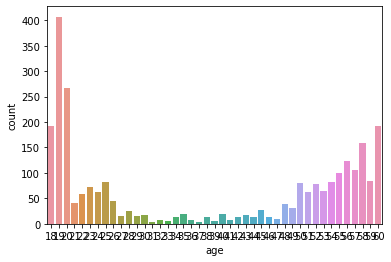

In [110]:
sns.countplot(data=mask_data, x='age')

In [88]:
def groupify(data):
    ans = 0
#     data = pd.to_numeric(data)
    if data < 30:
        pass
    elif data <60:
        ans= 1
    else:
        ans= 2
    return ans
mask_data['group'] = mask_data['age'].apply(groupify)

,id,gender,race,age,path,group
0,000001,0,Asian,45,000001_female_Asian_45,1
1,000002,0,Asian,52,000002_female_Asian_52,1
2,000004,1,Asian,54,000004_male_Asian_54,1
3,000005,0,Asian,58,000005_female_Asian_58,1
4,000006,0,Asian,59,000006_female_Asian_59,1
...,...,...,...,...,...,...
2695,006954,1,Asian,19,006954_male_Asian_19,0
2696,006955,1,Asian,19,006955_male_Asian_19,0
2697,006956,1,Asian,19,006956_male_Asian_19,0
2698,006957,1,Asian,20,006957_male_Asian_20,0


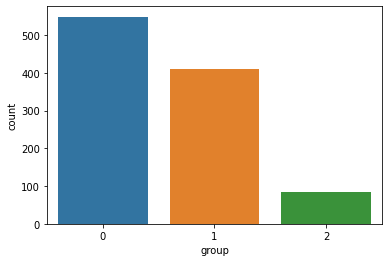

In [91]:
# 남자의 그룹별 인구 확인(0 < 30 , 1 <60, 2>=60)
sns.countplot(data= mask_data.query('gender==1'), x='group')

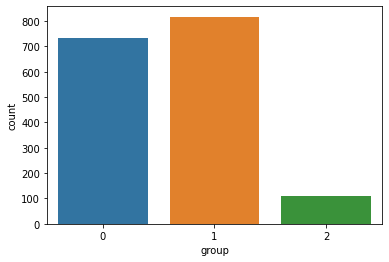

In [92]:
# 여자의 그룹별 인구 확인
sns.countplot(data=mask_data.query('gender==0'), x='group')

In [112]:
print(mask_data.groupby('group')['gender'].count())
print(mask_data.query('gender==0').groupby('group')['gender'].count())
mask_data.query('gender==1').groupby('group')['gender'].count()
print(f'0\n man : {549/1281*100}\t woman : {732/1281*100}')
print(f'1\n man : {410/1227*100}\t woman : {817/1227*100}')
print(f'2\n man : {83/192*100}\t woman : {109/192*100}')

group
0    1281
1    1227
2     192
Name: gender, dtype: int64
group
0    732
1    817
2    109
Name: gender, dtype: int64
0
 man : 42.857142857142854	 woman : 57.14285714285714
1
 man : 33.41483292583537	 woman : 66.58516707416463
2
 man : 43.22916666666667	 woman : 56.770833333333336


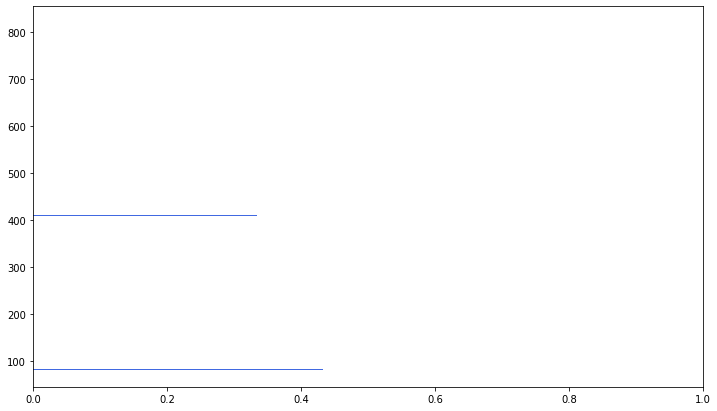

In [107]:
fix, ax = plt.subplots(1,1, figsize=(12,7))

total = mask_data.groupby('group')['gender'].count()
female = mask_data.query('gender==0').groupby('group')['gender'].count()
male = mask_data.query('gender==1').groupby('group')['gender'].count()
ax.barh(male, male/total, color='royalblue')
ax.barh(female, female/total, color='tomato')

ax.set_xlim(0,1)
plt.show()